In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import darts as darts

In [2]:
#load csv file
df = pd.read_csv('test_nn_c.csv', sep=';')

#show first 5 rows
df.head()

,Time,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18
0,05_12_2022_09_05_31,93.624000,64.262000,64.138000,74.27533333333334,0.0,0.000000,35.68666666666667,0.004667,49.976,0.091333,0.0,0.0,0.000000,0.000000,76.794000,99.733333,99.733333,99.733333
1,05_12_2022_09_21_59,89.998667,65.000000,64.523333,71.158,0.03933333333333333,20.972000,38.0,0.000000,46.0,0.004667,12.974,0.03933333333333333,0.046667,0.205333,76.144667,99.666667,99.600000,99.600000
2,05_12_2022_09_27_23,89.638000,64.776000,64.783333,70.81066666666666,0.0,20.958000,37.924,0.000000,45.89666666666667,0.000000,12.934666666666667,0.0,0.000000,0.000000,75.714667,99.600000,99.733333,99.612667
3,05_12_2022_09_32_47,89.938000,64.961333,65.000000,71.0,0.0,20.999333,38.0,0.000000,45.92066666666667,0.000000,12.822,0.0,0.000000,0.000000,76.000000,100.000000,100.000000,100.000000
4,05_12_2022_09_38_11,89.138667,64.391333,64.263333,71.41066666666667,0.059333333333333335,20.947333,37.898666666666664,0.022667,43.67333333333333,0.000000,12.708,0.032,0.020667,0.718667,75.825333,99.885333,99.800000,98.348667


In [3]:
def series_make(index):
    #load new variable with only the first and second column
    column1 = df.iloc[:,0]
    number_fill = index
    column2 = df.iloc[:,number_fill]
    df2 = pd.DataFrame({'Time': column1, 'F'+str(number_fill): column2})
    # Get name of the second column
    col2name = df2.columns[1]
    # Convert the second column to a float type and set it as the time series values
    values = df[col2name].astype(float).values
    # Create a TimeSeries object from the values, using the Time column as the time index (first column)
    time_index = darts.TimeSeries.from_times_and_values(df2.index, values)
    # Save as a TimeSeries object
    series = darts.TimeSeries.from_times_and_values(df2.index, values)

    return series

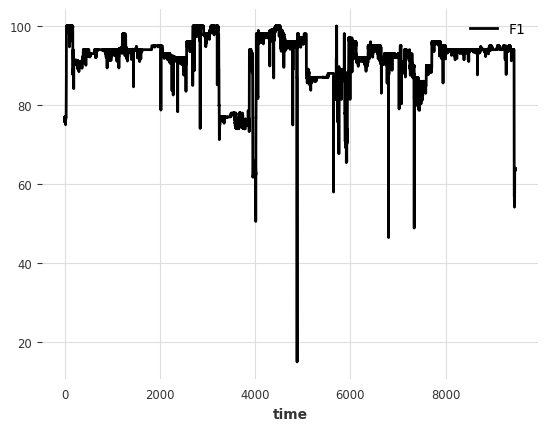

In [4]:
series3 = series_make(15)

series3.plot(label='F1')

plt.legend()

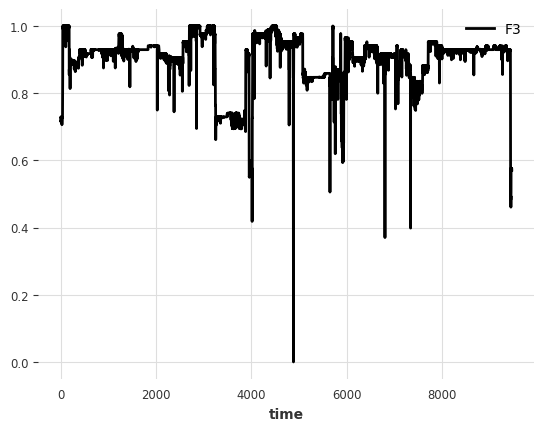

In [5]:
from darts.dataprocessing.transformers import Scaler
scaler1, scaler2, scaler3, scaler4, scaler5, scaler6, scaler7, scaler8, scaler9, scaler10, scaler11, scaler12, scaler13, scaler14, scaler15, scaler16, scaler17, scaler18 = Scaler(), Scaler(), Scaler(), Scaler(), Scaler(), Scaler(), Scaler(), Scaler(), Scaler(), Scaler(), Scaler(), Scaler(), Scaler(), Scaler(), Scaler(), Scaler(), Scaler(), Scaler()

series3_scaled = scaler3.fit_transform(series3)

series3_scaled.plot(label='F3')

plt.legend();

In [6]:
thresh_split = 0.8

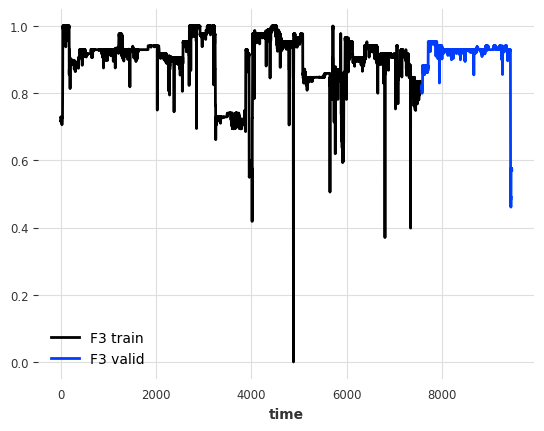

In [7]:
train_series3, val_series3 = series3_scaled.split_before(thresh_split)

train_series3.plot(label='F3 train')
val_series3.plot(label='F3 valid')

In [8]:
from darts import TimeSeries
from darts.utils.timeseries_generation import gaussian_timeseries, linear_timeseries, sine_timeseries
from darts.models import RNNModel, TCNModel, TransformerModel, NBEATSModel, BlockRNNModel, StatsForecastAutoARIMA, Prophet, TFTModel
from darts.metrics import mape, smape, mase, mse, r2_score, mae, rmse

In [9]:
def predict(model_air, train_air, series_air_scaled):
    pred = model_air.predict(n=8, series=train_air)

    series_air_scaled.plot(label='actual')
    pred.plot(label='forecast')
    plt.legend();

    mape_val = 0#mape(series_air_scaled, pred)
    smape_val = smape(series_air_scaled, pred)
    mase_val = mase(series_air_scaled, pred, train_air)
    mse_val = mse(series_air_scaled, pred)
    r2_val = r2_score(series_air_scaled, pred)
    mae_val = mae(series_air_scaled, pred)
    rmse_val = rmse(series_air_scaled, pred)

    print('MAPE = {:.2f}%'.format(mape_val))
    print('SMAPE = {:.2f}%'.format(smape_val))
    print('MASE = {:.2f}'.format(mase_val))
    print('MSE = {:.2f}'.format(mse_val))
    print('R2 = {:.2f}'.format(r2_val))
    print('MAE = {:.2f}'.format(mae_val))
    print('RMSE = {:.2f}'.format(rmse_val))
    
    return mape_val, smape_val, mase_val, mse_val, r2_val, mae_val, rmse_val

In [10]:
def predict_small(model,train,series):
    pred = model.predict(n=8, series=train)

    series[-2000:-1870].plot(label='actual')
    pred.plot(label='forecast')
    plt.legend();

In [11]:
epochs = 200

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Ti') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type              | Params
----------------------------------------------------
0 | criterion     | MSELoss           | 0     
1 | train_metrics | MetricCollection  | 0     
2 | val_metrics   | MetricCollection  | 0     
3 | dropout       | MonteCarloDropout | 0     
4 | res_blocks    | ModuleList        | 212   
----------------------------------------------------
212       Trainable params
0         Non-trainable

Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=200` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Ti') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

MAPE = 0.00%
SMAPE = 0.87%
MASE = 1.25
MSE = 0.00
R2 = -2.62
MAE = 0.01
RMSE = 0.01


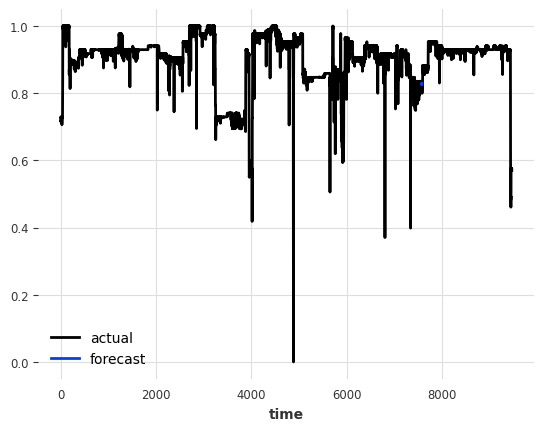

In [12]:
model = TCNModel(
    input_chunk_length=42, 
    output_chunk_length=8, 
    n_epochs=epochs, 
    random_state=0,
    pl_trainer_kwargs={
        "accelerator": "gpu",
        "devices": [0]
    }
    )

model.fit(train_series3, verbose=True)

mape_val, smape_val, mase_val, mse_val, r2_val, mae_val, rmse_val = predict(model, train_series3, series3_scaled)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Ti') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

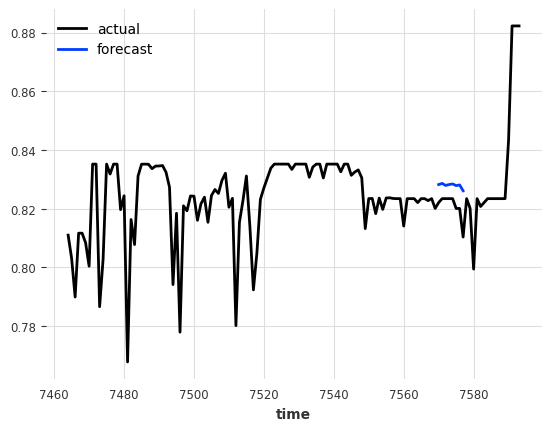

In [13]:
predict_small(model,train_series3,series3_scaled)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Ti') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

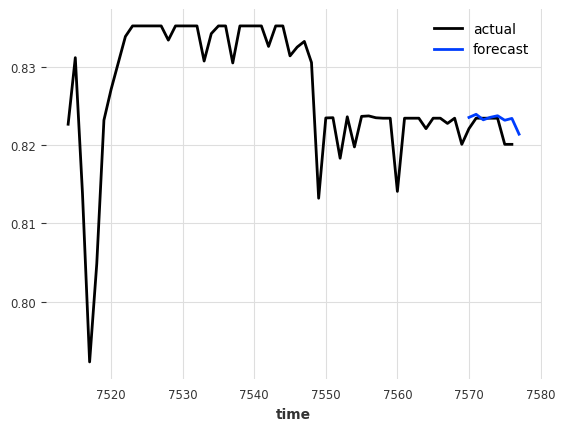

In [25]:
pred = model.predict(n=8, series=train_series3)

# Subtract 0.1 from every value in pred.values
adjusted_values = pred.values() - 0.0047

# Create a new TimeSeries with the adjusted values and the same time index as the original prediction
adjusted_pred = TimeSeries.from_times_and_values(pred.time_index, adjusted_values)

series3_scaled[-1950:-1887].plot(label='actual')
adjusted_pred.plot(label='forecast')
plt.legend()